In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.exp(2)

7.38905609893065

In [4]:
np.exp(-2)

0.1353352832366127

In [5]:
data = pd.DataFrame({'W':[62,58,70,75,92,55,90,97], 'HD':[0,0,0,1,1,0,1,1]  })

In [6]:
data

,W,HD
0,62,0
1,58,0
2,70,0
3,75,1
4,92,1
5,55,0
6,90,1
7,97,1


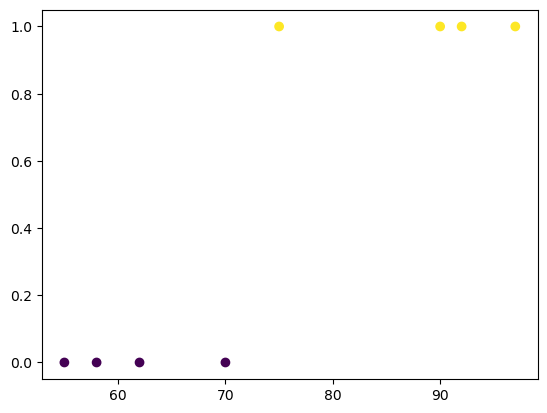

In [7]:
plt.scatter(data['W'], data['HD'], c=data['HD'])

In [8]:
# linear regression way to calculate beta
x = data['W']
y = data['HD']
b1 = np.sum((x-x.mean()) * (y-y.mean()) ) / np.sum((x-x.mean()) ** 2)
b1

0.028975875589818567

In [9]:
# linear regression way to calculate beta
b0 = y.mean() - b1*x.mean()
b0

-1.6695686847876652

In [10]:
yreg = b1*x + b0

In [11]:
yreg

0    0.126936
1    0.011032
2    0.358743
3    0.503622
4    0.996212
5   -0.075896
6    0.938260
7    1.141091
Name: W, dtype: float64

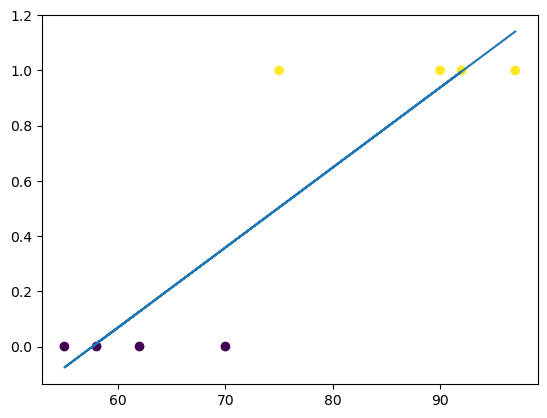

In [12]:
plt.scatter(data['W'], data['HD'], c=data['HD'])
plt.plot(x,yreg)
plt.show()

In [13]:
pvalue = np.exp(yreg) / (1+np.exp(yreg))
pvalue

0    0.531691
1    0.502758
2    0.588736
3    0.623310
4    0.730313
5    0.481035
6    0.718748
7    0.757880
Name: W, dtype: float64

In [14]:
pmean = pvalue.mean()
pmean # consideredd p-mean as threshold instead of 0.5

0.6168089847214485

In [15]:
p1 = pvalue.copy()

In [16]:
p1[p1>=pmean]=1
p1[p1<pmean]=0
p1

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
Name: W, dtype: float64

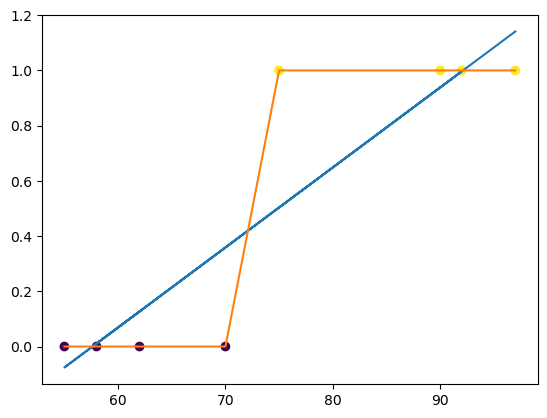

In [17]:
plt.scatter(data['W'], data['HD'], c=data['HD'])
plt.plot(x,yreg)
plt.plot(np.sort(x), np.sort(p1))
plt.show()

In [18]:
nll = - np.sum(y*np.log(pvalue)+(1-y)*np.log(1-pvalue))
nll

4.396213028330339

In [19]:
data = pd.read_csv('Admission_Predict.csv')

In [20]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


In [21]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [22]:
data = data.drop(columns=['Serial No.'], axis = 1)

In [23]:
out = data['Chance of Admit']

In [24]:
out

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit, Length: 400, dtype: int64

In [25]:
inp = data.drop(columns=['Chance of Admit'])

In [26]:
inp.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
inp_sc = sc.fit_transform(inp.iloc[:,:-1])
inp_sc = pd.DataFrame(inp_sc, columns=inp.columns[:-1])

In [28]:
inp_sc.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029


In [29]:
inp_sc['Research'] = inp['Research']

In [30]:
inp_sc

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,1
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,1
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,1
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,0


In [31]:
import statsmodels.api as sm

In [32]:
vif = pd.DataFrame()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif['VIF'] = [variance_inflation_factor(inp_sc.values, i) for i in range(inp_sc.shape[1])]
vif['feature'] = inp_sc.columns
vif.sort_values('VIF', ascending=False)

,VIF,feature
5,5.205309,CGPA
0,4.358514,GRE Score
1,4.282118,TOEFL Score
3,3.063188,SOP
2,2.918556,University Rating
4,2.430409,LOR
6,1.189484,Research


In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(inp_sc, out, test_size=0.2, random_state=40)

In [36]:
import statsmodels.api as sm

In [37]:
xtrainc = sm.add_constant(xtrain)
mod_stat = sm.Logit(ytrain, xtrainc)
logit_mod = mod_stat.fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.254834
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Sun, 09 Mar 2025   Pseudo R-squ.:                  0.6303
Time:                        09:54:01   Log-Likelihood:                -81.547
converged:                       True   LL-Null:                       -220.58
Covariance Type:            nonrobust   LLR p-value:                 2.901e-56
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7696      0.333     -2.308      0.021      -1.423      -0.116
GRE Score             0.5377      0.418      1.287      0.198      -0.281       1.356
TOEFL Score           0.8138      0.390      2.086      0.037       0.049       1.579
University Rating     0.3793      0.325      1.167      0.243      -0.258       1.016
SOP                   0.4210      0.372      1.133      0.257      -0.308       1.149
LOR                   0.3119      0.303      1.030      0.303      -0.281       0.905
CGPA                  2.0276      0.476      4.261      0.000       1.095       2.960
Research              0.4835      0.467      1.034      0.301      -0.433       1.400
=====================================================================================
"""

In [38]:
xtrain1 = xtrain.copy()
while(len(xtrain1.columns) > 0):
    xtrain1c = sm.add_constant(xtrain1)
    logit_mod= sm.Logit(ytrain, xtrain1c)
    mod_res = logit_mod.fit()
    f = mod_res.pvalues[1:].idxmax()
    if mod_res.pvalues[1:].max()>0.05:
        xtrain1 = xtrain1.drop(columns=f)
    else:
        break
print('The final features through backward eliminations are : ', xtrain1.columns)

Optimization terminated successfully.
         Current function value: 0.254834
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.256503
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.258136
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.260772
         Iterations 8
The final features through backward eliminations are :  Index(['GRE Score', 'TOEFL Score', 'SOP', 'CGPA'], dtype='object')


# Class 02

In [108]:
np.exp(mod_res.params)

const          0.582169
GRE Score      2.168741
TOEFL Score    2.228341
SOP            2.242207
CGPA           8.992565
dtype: float64

In [110]:
mod_log = LogisticRegression()
mod_log.fit(xtrain,ytrain)

LogisticRegression()

In [124]:
ypred = mod_log.predict(xtest)

In [116]:
from sklearn.metrics import confusion_matrix

In [130]:
cm = confusion_matrix(ytest, ypred)

In [136]:
ytest.value_counts()

Chance of Admit
0    46
1    34
Name: count, dtype: int64

<Axes: >

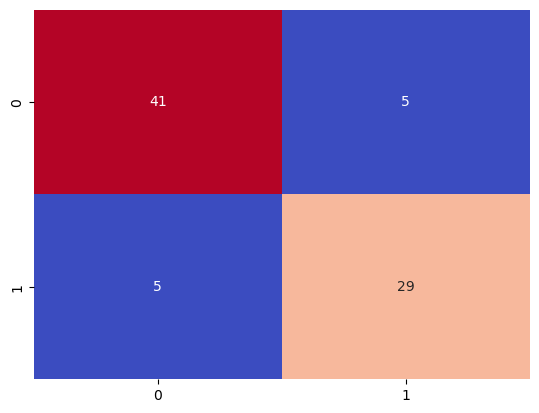

In [138]:
sns.heatmap(cm,annot=True, cmap = 'coolwarm', cbar = False)

In [152]:
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]

In [154]:
acc = (tp+tn)/(tp+tn+fp+fn)
acc*100

87.5

In [156]:
rec = tp / (tp+fn)
rec*100

85.29411764705883

In [158]:
prec = tp / (tp+fp)

In [162]:
prec*100

85.29411764705883

In [166]:
f1_sc = (2*rec*prec)/(rec+prec)
f1_sc*100

85.29411764705883

In [168]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [170]:
print(accuracy_score(ytest, y_pred))
print(recall_score(ytest, y_pred))
print(precision_score(ytest, y_pred))
print(f1_score(ytest, y_pred))

0.875
0.8529411764705882
0.8529411764705882
0.8529411764705882


In [172]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.85      0.85      0.85        34

    accuracy                           0.88        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80



In [174]:
from sklearn.metrics import roc_auc_score, roc_curve

In [178]:
yprob= mod_log.predict_proba(xtest)
yprob1 = yprob[:,1]
yprob1

array([3.05608645e-01, 2.01195224e-02, 4.17100106e-01, 5.43816368e-01,
       8.03031567e-01, 1.29367109e-01, 9.51565986e-01, 1.09462966e-01,
       8.85832897e-01, 1.92085499e-03, 6.30079389e-04, 3.93863447e-03,
       9.93783286e-01, 2.33906779e-03, 8.95701790e-01, 8.26400632e-01,
       6.94589774e-01, 7.46570484e-04, 3.82991031e-01, 1.44851263e-03,
       6.08384001e-01, 7.36843603e-01, 1.47522098e-03, 9.51086052e-01,
       9.76023233e-01, 8.31559176e-01, 8.11118674e-01, 2.50929491e-02,
       9.46584052e-01, 6.36830095e-02, 5.75216408e-01, 6.04547886e-02,
       8.21322583e-03, 4.39083973e-01, 7.57927624e-01, 3.41221040e-03,
       8.30075903e-02, 9.84251405e-01, 8.76202501e-01, 5.08159409e-03,
       8.50428965e-02, 8.26493988e-02, 4.48187115e-04, 8.19847460e-01,
       1.02458148e-01, 2.96080857e-01, 8.81271260e-01, 2.66560327e-01,
       2.05635513e-02, 8.68105563e-01, 9.73855383e-01, 2.02170479e-03,
       2.07043504e-02, 9.57612805e-01, 5.91418454e-01, 5.16193336e-04,
      

In [180]:
fpr, tpr,th = roc_curve(ytest, yprob1)

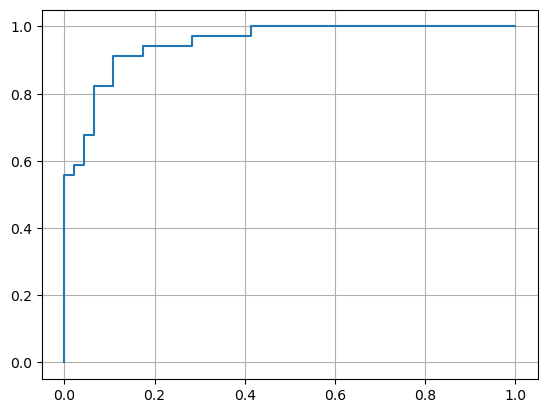

In [190]:
plt.plot(fpr, tpr)
plt.grid()

In [194]:
roc_auc_score(ytest, yprob1)

0.9507672634271099

In [196]:
from sklearn.metrics import cohen_kappa_score

In [200]:
cohen_kappa_score(ytest, ypred)

0.7442455242966752

In [202]:
mod_res.aic # Akaike information criteria
# After cmparing between 2 models, which is lesser one of AIC that is considered to be good one

176.89388411764003

In [206]:
mod_res.bic # The bayesian information criteria
# After cmparing between 2 models, which is lesser one of AIC that is considered to be good one

195.7354890966089

In [ ]:
# Here, AIC and BIC areless important compared other parameters like accuracy, precision etc

#### finding best threashold

In [212]:
th1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
acc=[]
rec=[]
pre=[]
f1=[]
for i in th1:
    ypred_th = np.zeros([len(ytest), 1])
    ypred_th[yprob1>i]=1
    acc.append(accuracy_score(ytest, ypred_th))
    rec.append(recall_score(ytest, ypred_th))
    pre.append(precision_score(ytest, ypred_th))
    f1.append(f1_score(ytest, ypred_th))
    

In [214]:
acc

[0.7875, 0.8625, 0.875, 0.9, 0.875, 0.8875, 0.8625, 0.8375, 0.7375]

In [216]:
rec

[0.9705882352941176,
 0.9411764705882353,
 0.9117647058823529,
 0.9117647058823529,
 0.8529411764705882,
 0.8235294117647058,
 0.7647058823529411,
 0.6764705882352942,
 0.38235294117647056]

In [218]:
pre

[0.673469387755102,
 0.7804878048780488,
 0.8157894736842105,
 0.8611111111111112,
 0.8529411764705882,
 0.9032258064516129,
 0.896551724137931,
 0.92,
 1.0]

In [228]:
df_comp = pd.DataFrame({
    
    "acc" : acc,
    "rec" : rec,
    "pre" : pre,
    "f1" : f1
})
df_comp

,acc,rec,pre,f1
0,0.7875,0.970588,0.673469,0.795181
1,0.8625,0.941176,0.780488,0.853333
2,0.8750,0.911765,0.815789,0.861111
3,0.9000,0.911765,0.861111,0.885714
4,0.8750,0.852941,0.852941,0.852941
5,0.8875,0.823529,0.903226,0.861538
6,0.8625,0.764706,0.896552,0.825397
7,0.8375,0.676471,0.920000,0.779661
8,0.7375,0.382353,1.000000,0.553191


In [238]:
df_comp2 = pd.DataFrame({
    'Threshold' : th,
    'TPR' : tpr,
    'FPR' : fpr
})
df_comp2

,Threshold,TPR,FPR
0,inf,0.000000,0.000000
1,0.999049,0.029412,0.000000
2,0.868106,0.558824,0.000000
3,0.831559,0.558824,0.021739
4,0.826401,0.588235,0.021739
5,0.819847,0.588235,0.043478
6,0.803032,0.676471,0.043478
7,0.773215,0.676471,0.065217
8,0.608384,0.823529,0.065217
9,0.575216,0.823529,0.108696


In [240]:
df_comp2['TPR-FPR'] = df_comp2['TPR'] - df_comp2['FPR']

In [242]:
df_comp2.sort_values('TPR-FPR', ascending=True).head()

,Threshold,TPR,FPR,TPR-FPR
0,inf,0.000000,0.000000,0.000000
17,0.000143,1.000000,1.000000,0.000000
1,0.999049,0.029412,0.000000,0.029412
3,0.831559,0.558824,0.021739,0.537084
5,0.819847,0.588235,0.043478,0.544757
